In [4]:
# to ignore the warnings 
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# # get the data from 

# !wget https://www.dropbox.com/s/jztol5j7hvm2w96/brain_tumor%20data%20set.zip

# # unzip the data
# !unzip "/content/brain_tumor data set.zip"
# !rm "/content/brain_tumor data set.zip"

# New Section

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os 
import shutil
import math
import imutils
import cv2

In [6]:
# count the number of images in the respective classes 

ROOT_DIR = "C:/Users/shukl/OneDrive/Python/Projects/Brain Tumor Data Set"

num_of_images = {}

for dir in os.listdir(ROOT_DIR):
  num_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

num_of_images

{'Brain Tumor': 17, 'Healthey': 16}

###we will split our data such that we have 
    * 70% for Train Data 
    * 15% for Validation 
    * 15% for Testing 

In [7]:
# we create a training folder 

if not os.path.exists("./train"):
  os.mkdir("./train")

  for dir in os.listdir(ROOT_DIR):
    os.makedirs("./train/"+dir)
    for img in np.random.choice(a=os.listdir(os.path.join(ROOT_DIR, dir) ) , 
                                size= (math.floor(70/100*num_of_images[dir])-5) , replace=False ):
      
      O = os.path.join(ROOT_DIR,dir,img)
      D = os.path.join('./train', dir)
      shutil.copy(O,D)
      os.remove(O)
else:
  print("Train Folder exist")

Train Folder exist


In [8]:
# we create a Validation folder 

if not os.path.exists("./val"):
  os.mkdir("./val")

  for dir in os.listdir(ROOT_DIR):
    os.makedirs("./val/"+dir)
    for img in np.random.choice(a=os.listdir(os.path.join(ROOT_DIR, dir) ) , 
                                size= (math.floor(15/100*num_of_images[dir])-5) , replace=False ):
      
      O = os.path.join(ROOT_DIR,dir,img)
      D = os.path.join('./val', dir)
      shutil.copy(O,D)
      os.remove(O)
else:
  print("Validation Folder Folder exist")

Validation Folder Folder exist


In [9]:
# we create a test folder 

if not os.path.exists("./test"):
  os.mkdir("./test")

  for dir in os.listdir(ROOT_DIR):
    os.makedirs("./test/"+dir)
    for img in np.random.choice(a=os.listdir(os.path.join(ROOT_DIR, dir) ) , 
                                size= (math.floor(15/100*num_of_images[dir])-5) , replace=False ):
      
      O = os.path.join(ROOT_DIR,dir,img)
      D = os.path.join('./test', dir)
      shutil.copy(O,D)
      os.remove(O)
else:
  print("Test Folder exist")

Test Folder exist


### Data Split is complete

## Creation of Model 

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,Conv2D, Flatten, MaxPool2D, Dropout, BatchNormalization, MaxPooling2D, GlobalAvgPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow import keras

In [11]:
# Cnn model 
model = Sequential() 
model.add(Conv2D(filters=16, kernel_size= (3,3), activation= 'relu', input_shape=(224,224,3)) )

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25))# Reduce overfit

model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=1, activation='sigmoid'))
 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 16)      448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 32)      4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0

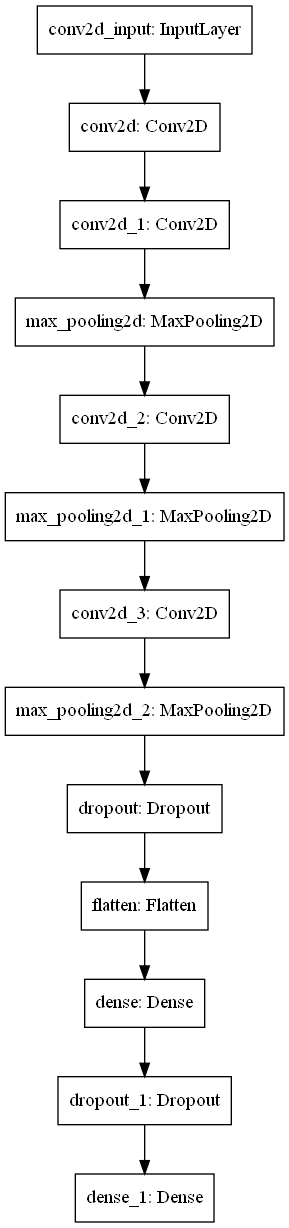

In [12]:
keras.utils.plot_model(model)

In [13]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']  )

## Preparing our data using data generator 

In [14]:
#train_datagen = image.ImageDataGenerator(preprocessing_function= , )

In [15]:
train_datagen = image.ImageDataGenerator(
     zoom_range = 0.2, shear_range = 0.2 , rescale = 1./255 , horizontal_flip=True
)

val_datagen = image.ImageDataGenerator(rescale = 1./255)

test_datagen = image.ImageDataGenerator(rescale = 1./255)

In [16]:
train_data = train_datagen.flow_from_directory(directory= "C:/Users/shukl/OneDrive/Python/Projects/train", target_size=(224,224), batch_size=32,
                                  class_mode = 'binary', 
                                  )

Found 3209 images belonging to 2 classes.


In [17]:
train_data.class_indices

{'Brain Tumor': 0, 'Healthey': 1}

In [18]:
val_data = val_datagen.flow_from_directory(directory= "C:/Users/shukl/OneDrive/Python/Projects/val", target_size=(224,224), batch_size=32,
                                  class_mode = 'binary'
                                  )

Found 679 images belonging to 2 classes.


In [19]:
test_data = test_datagen.flow_from_directory(directory= "C:/Users/shukl/OneDrive/Python/Projects/test", target_size=(224,224), batch_size=32,
                                  class_mode = 'binary'
                                  )

Found 679 images belonging to 2 classes.


In [21]:
## having early stopping and model check point 
from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 5, verbose= 1, mode='auto')

# model check point
mc = ModelCheckpoint(filepath="best_model.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

# puting call back in a list 
call_back = [es, mc]

In [22]:
hist = model.fit(x=train_data , steps_per_epoch= 8, 
                              epochs= 30 , verbose= 1, 
                              validation_data= val_data , 
                              validation_steps= 16,
                              callbacks = call_back )

Epoch 1/30
8/8 [==============================] - 110s 14s/step - loss: 1.2014 - accuracy: 0.4688 - val_loss: 0.6901 - val_accuracy: 0.5449

Epoch 00001: val_accuracy improved from -inf to 0.54492, saving model to best_model.h5
Epoch 2/30
8/8 [==============================] - 148s 19s/step - loss: 0.6873 - accuracy: 0.5547 - val_loss: 0.6632 - val_accuracy: 0.6035

Epoch 00002: val_accuracy improved from 0.54492 to 0.60352, saving model to best_model.h5
Epoch 3/30
8/8 [==============================] - 187s 23s/step - loss: 0.6862 - accuracy: 0.5579 - val_loss: 0.6496 - val_accuracy: 0.6250

Epoch 00003: val_accuracy improved from 0.60352 to 0.62500, saving model to best_model.h5
Epoch 4/30
8/8 [==============================] - 192s 24s/step - loss: 0.6660 - accuracy: 0.6055 - val_loss: 0.6142 - val_accuracy: 0.6719

Epoch 00004: val_accuracy improved from 0.62500 to 0.67188, saving model to best_model.h5
Epoch 5/30
8/8 [==============================] - 179s 22s/step - loss: 0.6542 

In [23]:
# Loading the best fit model 
from keras.models import load_model

model = load_model("C:/Users/shukl/OneDrive/Python/Projects/best_model.h5")

# Model Accuracy

In [24]:
# checking out the accuracy of our model 

acc = model.evaluate_generator(generator= test_data,steps=len(test_data),verbose=1)[1] 

print(f"The accuracy of your model is = {acc*100} %")

22/22 [==============================] - 33s 1s/step - loss: 0.4734 - accuracy: 0.7894
The accuracy of your model is = 78.93961668014526 %


In [25]:
h =  hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

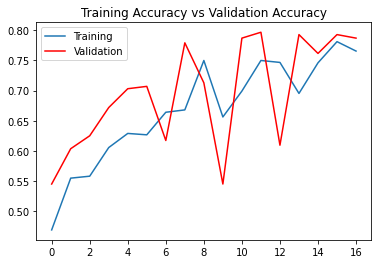

In [26]:
plt.plot(h['accuracy'], label = "Training")
plt.plot(h['val_accuracy'] , c = "red",label="Validation")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend()
plt.show()

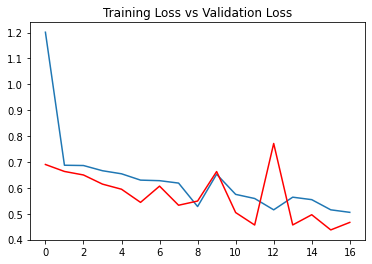

In [27]:
plt.plot(h['loss'], label = "Training")
plt.plot(h['val_loss'] , c = "red",label="Validation")
plt.title("Training Loss vs Validation Loss")
plt.show()

In [32]:
# path for the image to see if it predics correct class
path = "C:/Users/shukl/OneDrive/Python/Projects/Brain Tumor Data Set/Healthey/Not Cancer  (1210).jpg"
img = image.load_img(path, target_size=(224,224),  )

i = image.img_to_array(img)/255.0
input_arr = np.array([i])
input_arr.shape

pred = int((model.predict(input_arr)[0][0] > 0.5))
#print(pred,model.predict(input_arr)[0][0])
#print(pred)
if pred == 0:
  print("The MRI image is of BRAIN TUMOR")
else:
  print("The MRI image is of Healthy brain")

The MRI image is of Healthy brain
